In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('hdon275_722').getOrCreate()
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
# Importing data which has a header. Schema is automatically configured.
file = spark.read.csv('./Measurement_summary.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
file.show()


+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+
|2017-01-01 00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.059|               0.002|1.2|73.0| 57.0|
|2017-01-01 01:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.058|               0.002|1.2|71.0| 59.0|
|2017-01-01 02:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 59.0|
|2017-01-01 03:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 58.0|
|2017-01-01 04:00|         

In [3]:
file.columns

['Measurement date',
 'Station code',
 'Address',
 'Latitude',
 'Longitude',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'PM10',
 'PM2.5']

In [4]:
file.printSchema()

root
 |-- Measurement date: string (nullable = true)
 |-- Station code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM2.5: double (nullable = true)



In [5]:
file.count()

647511

In [3]:
# Importing data which has a header. Schema is automatically configured.
station_file = spark.read.csv('./Measurement_info.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
station_file.show()

+----------------+------------+---------+--------------------+-----------------+
|Measurement date|Station code|Item code|       Average value|Instrument status|
+----------------+------------+---------+--------------------+-----------------+
|2017-01-01 00:00|         101|        1|               0.004|                0|
|2017-01-01 00:00|         101|        3|0.059000000000000004|                0|
|2017-01-01 00:00|         101|        5|                 1.2|                0|
|2017-01-01 00:00|         101|        6|               0.002|                0|
|2017-01-01 00:00|         101|        8|                73.0|                0|
|2017-01-01 00:00|         101|        9|                57.0|                0|
|2017-01-01 00:00|         102|        1|               0.006|                0|
|2017-01-01 00:00|         102|        3|               0.068|                0|
|2017-01-01 00:00|         102|        5|                 1.3|                0|
|2017-01-01 00:00|         1

In [7]:
station_file.describe().show()

+-------+----------------+------------------+-----------------+------------------+-------------------+
|summary|Measurement date|      Station code|        Item code|     Average value|  Instrument status|
+-------+----------------+------------------+-----------------+------------------+-------------------+
|  count|         3885066|           3885066|          3885066|           3885066|            3885066|
|   mean|            null|113.00022084566903|5.333333333333333|11.611324235608173|0.14718900528330792|
| stddev|            null| 7.211310464406794|2.748737437502079| 38.16098090381736| 1.0216420958778007|
|    min|2017-01-01 00:00|               101|                1|              -1.0|                  0|
|    max|2019-12-31 23:00|               125|                9|            6256.0|                  9|
+-------+----------------+------------------+-----------------+------------------+-------------------+



In [8]:
station_file.columns

['Measurement date',
 'Station code',
 'Item code',
 'Average value',
 'Instrument status']

In [6]:
station_status=pandas.read_csv("Measurement_info.csv")
print("Instrument status: ",station_status["Instrument status"].unique())

Instrument status:  [0 9 4 8 1 2]


In [8]:
file_pandas=pandas.read_csv("Measurement_summary.csv")

In [12]:
print(file_pandas.shape)#The number of rows and columns of the output data set

(647511, 11)


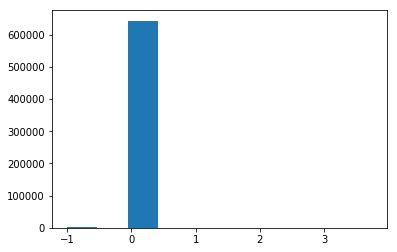

In [14]:
plt.hist(file_pandas["SO2"])
plt.show()

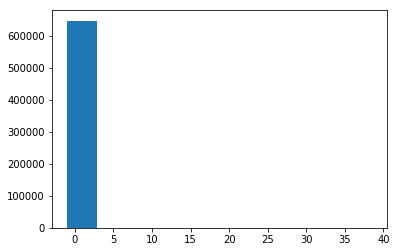

In [16]:
plt.hist(file_pandas["NO2"])
plt.show()

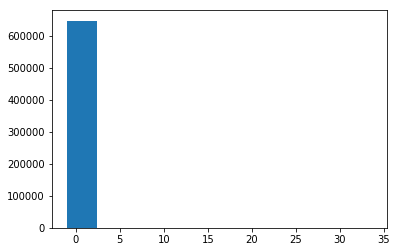

In [17]:
plt.hist(file_pandas["O3"])
plt.show()

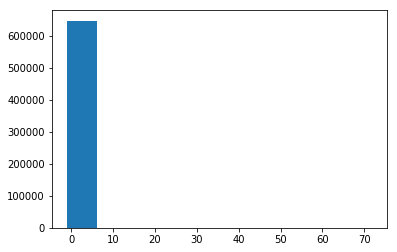

In [18]:
plt.hist(file_pandas["CO"])
plt.show()

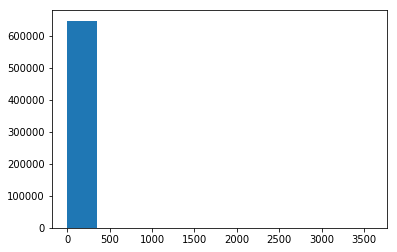

In [19]:
plt.hist(file_pandas["PM10"])
plt.show()

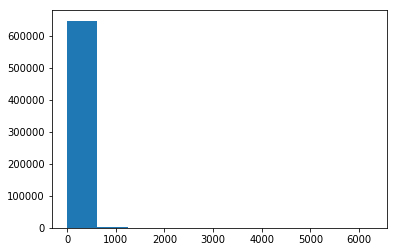

In [20]:
plt.hist(file_pandas["PM2.5"])
plt.show()

In [21]:
print(station_status[station_status["Instrument status"]!=0])

         Measurement date  Station code  Item code  Average value  \
668      2017-01-01 04:00           112          5          1.500   
809      2017-01-01 05:00           110          9         62.000   
1028     2017-01-01 06:00           122          5          2.300   
1178     2017-01-01 07:00           122          5          2.000   
1193     2017-01-01 07:00           124          9         52.000   
1217     2017-01-01 08:00           103          9         69.000   
1367     2017-01-01 09:00           103          9         74.000   
1445     2017-01-01 09:00           116          9         61.000   
1859     2017-01-01 12:00           110          9         83.000   
2018     2017-01-01 13:00           112          5          0.100   
2168     2017-01-01 14:00           112          5          0.100   
2216     2017-01-01 14:00           120          5          0.100   
2318     2017-01-01 15:00           112          5          0.100   
2468     2017-01-01 16:00         

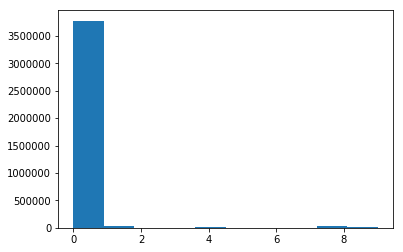

In [22]:
plt.hist(station_status["Instrument status"])
plt.show()

In [24]:
print(sorted(file_pandas["PM2.5"], reverse=True)[:10])
print(sorted(file_pandas["PM2.5"], reverse=True)[-10:])

[6256.0, 995.0, 995.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0]
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [26]:
print("SO2: ",sorted(file_pandas["SO2"], reverse=True)[:10])
print("NO2: ",sorted(file_pandas["NO2"], reverse=True)[:10])
print("O3: ",sorted(file_pandas["O3"], reverse=True)[:10])
print("CO: ",sorted(file_pandas["CO"], reverse=True)[:10])
print("PM10: ",sorted(file_pandas["PM10"], reverse=True)[:10])

SO2:  [3.736, 2.7, 2.7, 1.33, 0.406, 0.37799999999999995, 0.3720000000000001, 0.37, 0.365, 0.35]
NO2:  [38.445, 37.5, 30.7, 20.1, 12.805, 0.31, 0.248, 0.235, 0.14400000000000002, 0.135]
O3:  [33.6, 23.4, 12.455, 6.32, 5.2970000000000015, 1.901, 1.8259999999999998, 1.3459999999999999, 1.254, 1.147]
CO:  [71.7, 69.1, 59.3, 47.2, 40.0, 38.4, 37.5, 36.8, 36.7, 33.4]
PM10:  [3586.0, 3577.0, 3568.0, 3561.0, 3556.0, 3552.0, 3545.0, 3540.0, 3533.0, 3527.0]


<font face="微软雅黑" size=5  > 3.1 Selecting Data
<font face="微软雅黑" size=5  > Discard unnecessary variables

In [4]:
fileColumn = file.drop('Address','Latitude','Longitude')
fileColumn.columns

['Measurement date', 'Station code', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

In [2]:
filepandas=pandas.read_csv("Measurement_summary.csv")
cols=[col for col in filepandas.columns if col not in ["Address",
                                                 "Latitude","Longitude"]]
filepandas=filepandas[cols]

<font face="微软雅黑" size=5  >3.2 Cleaning Data
<font face="微软雅黑" size=4  >3.2.1 Processing of SO2 problem data

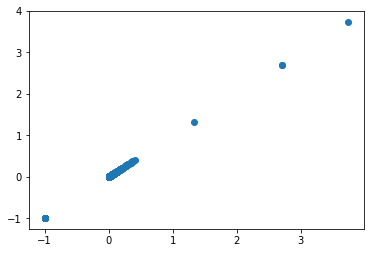

In [3]:
plt.scatter(filepandas["SO2"], filepandas["SO2"], marker='o')
plt.show()

In [3]:
print("SO2 data sorting in descending order:",sorted(filepandas["SO2"], reverse=True)[:10])

SO2 data sorting in descending order: [3.736, 2.7, 2.7, 1.33, 0.406, 0.37799999999999995, 0.3720000000000001, 0.37, 0.365, 0.35]


In [4]:
print("The number of rows and columns of the data set:",filepandas.shape)
print(filepandas[filepandas['SO2'].isin([3.736, 2.7, 2.7, 1.33])])

The number of rows and columns of the data set: (647511, 8)
        Measurement date  Station code    SO2     NO2      O3   CO  PM10  \
424685  2018-03-05 09:00           117  2.700  30.700  23.400  0.4   5.0   
424686  2018-03-05 10:00           117  2.700  20.100  33.600  0.3   8.0   
424709  2018-03-06 09:00           117  3.736  38.445  12.455  0.4  35.0   
424710  2018-03-06 10:00           117  1.330  12.805   6.320  0.5  34.0   

        PM2.5  
424685    6.0  
424686    1.0  
424709   17.0  
424710   15.0  


In [5]:
filepandas=filepandas.drop([424685,424686,424709,424710])
print("New SO2 data sorting in descending order:",sorted(filepandas["SO2"], reverse=True)[:10])
print("The number of rows and columns of the data set:",filepandas.shape)

New SO2 data sorting in descending order: [0.406, 0.37799999999999995, 0.3720000000000001, 0.37, 0.365, 0.35, 0.342, 0.342, 0.332, 0.312]
The number of rows and columns of the data set: (647507, 8)


<font face="微软雅黑" size=4  >3.2.2 Processing of NO2 problem data

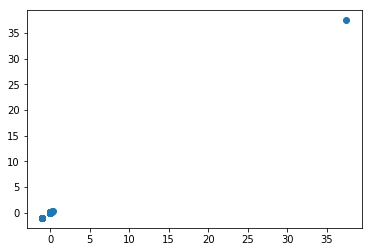

In [7]:
plt.scatter(filepandas["NO2"], filepandas["NO2"], marker='o')
plt.show()

In [6]:
print("NO2 data sorting in descending order:",sorted(filepandas["NO2"], reverse=True)[:10])

NO2 data sorting in descending order: [37.5, 0.31, 0.248, 0.235, 0.14400000000000002, 0.135, 0.12300000000000001, 0.122, 0.122, 0.122]


In [7]:
print("The number of rows and columns of the data set:",filepandas.shape)
print(filepandas[filepandas['NO2'].isin([37.5])])

The number of rows and columns of the data set: (647507, 8)
        Measurement date  Station code  SO2   NO2   O3   CO  PM10  PM2.5
424684  2018-03-05 08:00           117  0.0  37.5  0.0  0.0   0.0    0.0


In [8]:
filepandas=filepandas.drop([424684])
print("New NO2 data sorting in descending order:",sorted(filepandas["NO2"], reverse=True)[:10])
print("The number of rows and columns of the data set:",filepandas.shape)

New NO2 data sorting in descending order: [0.31, 0.248, 0.235, 0.14400000000000002, 0.135, 0.12300000000000001, 0.122, 0.122, 0.122, 0.121]
The number of rows and columns of the data set: (647506, 8)


<font face="微软雅黑" size=4  >3.2.3 Processing of O3 problem data

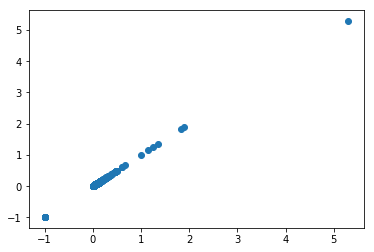

In [11]:
plt.scatter(filepandas["O3"], filepandas["O3"], marker='o')
plt.show()

In [9]:
print("O3 data sorting in descending order:",sorted(filepandas["O3"], reverse=True)[:10])

O3 data sorting in descending order: [5.2970000000000015, 1.901, 1.8259999999999998, 1.3459999999999999, 1.254, 1.147, 1.0090000000000001, 0.6709999999999999, 0.614, 0.614]


In [10]:
print("The number of rows and columns of the data set:",filepandas.shape)
print(filepandas[filepandas['O3'].isin([5.2970000000000015])])

The number of rows and columns of the data set: (647506, 8)
        Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5
263389  2017-07-02 21:00           111  0.002  0.021  5.297  0.4  14.0    8.0


In [11]:
filepandas=filepandas.drop([263389])
print("New O3 data sorting in descending order:",sorted(filepandas["O3"], reverse=True)[:10])
print("The number of rows and columns of the data set:",filepandas.shape)

New O3 data sorting in descending order: [1.901, 1.8259999999999998, 1.3459999999999999, 1.254, 1.147, 1.0090000000000001, 0.6709999999999999, 0.614, 0.614, 0.498]
The number of rows and columns of the data set: (647505, 8)


<font face="微软雅黑" size=4  >3.2.4 Processing of PM 2.5 problem data

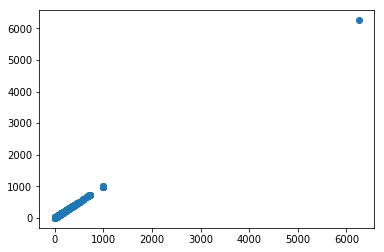

In [15]:
plt.scatter(filepandas["PM2.5"], filepandas["PM2.5"], marker='o')
plt.show()

In [12]:
print("New PM2.5 data sorting in descending order:",sorted(filepandas["PM2.5"], reverse=True)[:10])

New PM2.5 data sorting in descending order: [6256.0, 995.0, 995.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0]


In [13]:
print("The number of rows and columns of the data set:",filepandas.shape)
print(filepandas[filepandas['PM2.5'].isin([6256])])

The number of rows and columns of the data set: (647505, 8)
       Measurement date  Station code    SO2    NO2     O3   CO  PM10   PM2.5
62770  2018-04-02 16:00           103  0.004  0.018  0.048  0.3  68.0  6256.0


In [14]:
filepandas=filepandas.drop(62770)
print("New PM2.5 data sorting in descending order:",sorted(filepandas["PM2.5"], reverse=True)[:10])
print("The number of rows and columns of the data set:",filepandas.shape)

New PM2.5 data sorting in descending order: [995.0, 995.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0, 985.0]
The number of rows and columns of the data set: (647504, 8)


<font face="微软雅黑" size=4  >3.2.5 Clear missing data

In [15]:
for i in filepandas.columns:
    filepandas = filepandas.drop(filepandas[filepandas[i] ==0].index)
    filepandas = filepandas.drop(filepandas[filepandas[i] ==-1].index)

In [16]:
for i in filepandas.columns:
    print(i,"sorting in ascending order:",sorted(filepandas[i])[:10])

Measurement date sorting in ascending order: ['2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00', '2017-01-01 00:00']
Station code sorting in ascending order: [101, 101, 101, 101, 101, 101, 101, 101, 101, 101]
SO2 sorting in ascending order: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
NO2 sorting in ascending order: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
O3 sorting in ascending order: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
CO sorting in ascending order: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
PM10 sorting in ascending order: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
PM2.5 sorting in ascending order: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [17]:
print("The number of rows and columns of the data set:",filepandas.shape)

The number of rows and columns of the data set: (632441, 8)


<font face="微软雅黑" size=5  >3.3 Constructing New Data

In [18]:
filepandas.loc[filepandas["SO2"]<=0.02,'SO2_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["SO2"]> 0.02 ) & (filepandas["SO2"]<=0.05),'SO2_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["SO2"]> 0.05 ) & (filepandas["SO2"]<=0.15),'SO2_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["SO2"]>0.15,'SO2_state'] = 'Very bad(Red)'
print(filepandas["SO2_state"].unique())
print(filepandas[filepandas["SO2_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","SO2",'SO2_state']],'\n',
      filepandas[filepandas["SO2_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","SO2",'SO2_state']],'\n',
      filepandas[filepandas["SO2_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","SO2",'SO2_state']],'\n',
      filepandas[filepandas["SO2_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","SO2",'SO2_state']])

['Good(Blue)' 'Bad(Yellow)' 'Normal(Green)' 'Very bad(Red)']
   Measurement date  Station code    SO2   SO2_state
0  2017-01-01 00:00           101  0.004  Good(Blue)
1  2017-01-01 01:00           101  0.004  Good(Blue) 
      Measurement date  Station code    SO2    SO2_state
230  2017-01-10 14:00           101  0.051  Bad(Yellow)
540  2017-01-23 12:00           101  0.106  Bad(Yellow) 
       Measurement date  Station code    SO2      SO2_state
231   2017-01-10 15:00           101  0.029  Normal(Green)
1117  2017-02-16 13:00           101  0.024  Normal(Green) 
        Measurement date  Station code    SO2      SO2_state
15565  2018-10-11 13:00           101  0.372  Very bad(Red)
15589  2018-10-12 13:00           101  0.406  Very bad(Red)


In [19]:
filepandas.loc[filepandas["NO2"]<=0.03,'NO2_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["NO2"]> 0.03 ) & (filepandas["NO2"]<=0.06),'NO2_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["NO2"]> 0.06 ) & (filepandas["NO2"]<=0.2),'NO2_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["NO2"]>0.2,'NO2_state'] = 'Very bad(Red)'
print(filepandas["NO2_state"].unique())
print(filepandas[filepandas["NO2_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","NO2",'NO2_state']],'\n',
      filepandas[filepandas["NO2_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","NO2",'NO2_state']],'\n',
      filepandas[filepandas["NO2_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","NO2",'NO2_state']],'\n',
      filepandas[filepandas["NO2_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","NO2",'NO2_state']])

['Normal(Green)' 'Bad(Yellow)' 'Good(Blue)' 'Very bad(Red)']
    Measurement date  Station code    NO2   NO2_state
46  2017-01-02 22:00           101  0.028  Good(Blue)
47  2017-01-02 23:00           101  0.019  Good(Blue) 
     Measurement date  Station code    NO2    NO2_state
16  2017-01-01 16:00           101  0.063  Bad(Yellow)
17  2017-01-01 17:00           101  0.063  Bad(Yellow) 
    Measurement date  Station code    NO2      NO2_state
0  2017-01-01 00:00           101  0.059  Normal(Green)
1  2017-01-01 01:00           101  0.058  Normal(Green) 
         Measurement date  Station code    NO2      NO2_state
30138   2017-06-26 09:00           102  0.248  Very bad(Red)
471862  2017-08-24 22:00           119  0.235  Very bad(Red)


In [20]:
filepandas.loc[filepandas["CO"]<=2,'CO_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["CO"]> 2 ) & (filepandas["CO"]<=9),'CO_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["CO"]> 9 ) & (filepandas["CO"]<=15),'CO_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["CO"]>15,'CO_state'] = 'Very bad(Red)'
print(filepandas["CO_state"].unique())
print(filepandas[filepandas["CO_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","CO",'CO_state']],'\n',
      filepandas[filepandas["CO_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","CO",'CO_state']],'\n',
      filepandas[filepandas["CO_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","CO",'CO_state']],'\n',
      filepandas[filepandas["CO_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","CO",'CO_state']])

['Good(Blue)' 'Normal(Green)' 'Bad(Yellow)' 'Very bad(Red)']
   Measurement date  Station code   CO    CO_state
0  2017-01-01 00:00           101  1.2  Good(Blue)
1  2017-01-01 01:00           101  1.2  Good(Blue) 
       Measurement date  Station code    CO     CO_state
540   2017-01-23 12:00           101  11.2  Bad(Yellow)
1116  2017-02-16 12:00           101   9.9  Bad(Yellow) 
      Measurement date  Station code   CO       CO_state
230  2017-01-10 14:00           101  6.0  Normal(Green)
231  2017-01-10 15:00           101  2.9  Normal(Green) 
        Measurement date  Station code    CO       CO_state
15565  2018-10-11 13:00           101  38.4  Very bad(Red)
15589  2018-10-12 13:00           101  40.0  Very bad(Red)


In [21]:
filepandas.loc[filepandas["O3"]<=0.03,'O3_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["O3"]> 0.03 ) & (filepandas["O3"]<=0.09),'O3_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["O3"]> 0.09 ) & (filepandas["O3"]<=0.15),'O3_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["O3"]>0.15,'O3_state'] = 'Very bad(Red)'
print(filepandas["O3_state"].unique())
print(filepandas[filepandas["O3_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","O3",'O3_state']],'\n',
      filepandas[filepandas["O3_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","O3",'O3_state']],'\n',
      filepandas[filepandas["O3_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","O3",'O3_state']],'\n',
      filepandas[filepandas["O3_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","O3",'O3_state']])

['Good(Blue)' 'Normal(Green)' 'Bad(Yellow)' 'Very bad(Red)']
   Measurement date  Station code     O3    O3_state
0  2017-01-01 00:00           101  0.002  Good(Blue)
1  2017-01-01 01:00           101  0.002  Good(Blue) 
       Measurement date  Station code     O3     O3_state
2868  2017-04-30 12:00           101  0.091  Bad(Yellow)
2869  2017-04-30 13:00           101  0.093  Bad(Yellow) 
     Measurement date  Station code     O3       O3_state
36  2017-01-02 12:00           101  0.031  Normal(Green)
37  2017-01-02 13:00           101  0.034  Normal(Green) 
        Measurement date  Station code     O3       O3_state
13599  2018-07-21 15:00           101  0.161  Very bad(Red)
13671  2018-07-24 15:00           101  0.164  Very bad(Red)


In [22]:
filepandas.loc[filepandas["PM10"]<=30,'PM10_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["PM10"]> 30 ) & (filepandas["PM10"]<=80),'PM10_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["PM10"]> 80 ) & (filepandas["PM10"]<=150),'PM10_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["PM10"]>150,'PM10_state'] = 'Very bad(Red)'
print(filepandas["PM10_state"].unique())
print(filepandas[filepandas["PM10_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","PM10",'PM10_state']],'\n',
      filepandas[filepandas["PM10_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","PM10",'PM10_state']],'\n',
      filepandas[filepandas["PM10_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","PM10",'PM10_state']],'\n',
      filepandas[filepandas["PM10_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","PM10",'PM10_state']])


['Normal(Green)' 'Bad(Yellow)' 'Very bad(Red)' 'Good(Blue)']
     Measurement date  Station code  PM10  PM10_state
74   2017-01-04 02:00           101  29.0  Good(Blue)
109  2017-01-05 13:00           101  19.0  Good(Blue) 
     Measurement date  Station code  PM10   PM10_state
11  2017-01-01 11:00           101  83.0  Bad(Yellow)
12  2017-01-01 12:00           101  93.0  Bad(Yellow) 
    Measurement date  Station code  PM10     PM10_state
0  2017-01-01 00:00           101  73.0  Normal(Green)
1  2017-01-01 01:00           101  71.0  Normal(Green) 
     Measurement date  Station code   PM10     PM10_state
43  2017-01-02 19:00           101  160.0  Very bad(Red)
44  2017-01-02 20:00           101  154.0  Very bad(Red)


In [23]:
filepandas.loc[filepandas["PM2.5"]<=15,'PM2.5_state'] = 'Good(Blue)'
filepandas.loc[(filepandas["PM2.5"]> 15 ) & (filepandas["PM2.5"]<=35),'PM2.5_state'] = 'Normal(Green)'
filepandas.loc[(filepandas["PM2.5"]> 35 ) & (filepandas["PM2.5"]<=75),'PM2.5_state'] = 'Bad(Yellow)'
filepandas.loc[filepandas["PM2.5"]>75,'PM2.5_state'] = 'Very bad(Red)'
print(filepandas["PM2.5_state"].unique())
print(filepandas[filepandas["PM2.5_state"]=="Good(Blue)"].head(2).loc[:,["Measurement date","Station code","PM2.5",'PM2.5_state']],'\n',
      filepandas[filepandas["PM2.5_state"]=="Bad(Yellow)"].head(2).loc[:,["Measurement date","Station code","PM2.5",'PM2.5_state']],'\n',
      filepandas[filepandas["PM2.5_state"]=="Normal(Green)"].head(2).loc[:,["Measurement date","Station code","PM2.5",'PM2.5_state']],'\n',
      filepandas[filepandas["PM2.5_state"]=="Very bad(Red)"].head(2).loc[:,["Measurement date","Station code","PM2.5",'PM2.5_state']])


['Bad(Yellow)' 'Very bad(Red)' 'Normal(Green)' 'Good(Blue)']
     Measurement date  Station code  PM2.5 PM2.5_state
109  2017-01-05 13:00           101   11.0  Good(Blue)
110  2017-01-05 14:00           101    6.0  Good(Blue) 
    Measurement date  Station code  PM2.5  PM2.5_state
0  2017-01-01 00:00           101   57.0  Bad(Yellow)
1  2017-01-01 01:00           101   59.0  Bad(Yellow) 
     Measurement date  Station code  PM2.5    PM2.5_state
64  2017-01-03 16:00           101   32.0  Normal(Green)
65  2017-01-03 17:00           101   25.0  Normal(Green) 
     Measurement date  Station code  PM2.5    PM2.5_state
12  2017-01-01 12:00           101   79.0  Very bad(Red)
13  2017-01-01 13:00           101   79.0  Very bad(Red)


<font face="微软雅黑" size=4  >3.4 Data Integration

In [24]:
station_adress=pandas.read_csv("Measurement_station_info.csv")
print(station_adress)

    Station code Station name(district)  \
0            101              Jongno-gu   
1            102                Jung-gu   
2            103             Yongsan-gu   
3            104           Eunpyeong-gu   
4            105           Seodaemun-gu   
5            106                Mapo-gu   
6            107           Seongdong-gu   
7            108            Gwangjin-gu   
8            109          Dongdaemun-gu   
9            110            Jungnang-gu   
10           111            Seongbuk-gu   
11           112             Gangbuk-gu   
12           113              Dobong-gu   
13           114               Nowon-gu   
14           115           Yangcheon-gu   
15           116             Gangseo-gu   
16           117                Guro-gu   
17           118           Geumcheon-gu   
18           119        Yeongdeungpo-gu   
19           120             Dongjak-gu   
20           121              Gwanak-gu   
21           122              Seocho-gu   
22         

In [25]:
x=station_adress["Station code"].unique()
for i in x:
    filepandas.loc[filepandas["Station code"]== i ,'Station code'] = station_adress[station_adress["Station code"]== i ].loc[:
                                                                                                    ,"Station name(district)"].unique()
print(filepandas["Station code"].unique())

['Jongno-gu' 'Jung-gu' 'Yongsan-gu' 'Eunpyeong-gu' 'Seodaemun-gu'
 'Mapo-gu' 'Seongdong-gu' 'Gwangjin-gu' 'Dongdaemun-gu' 'Jungnang-gu'
 'Seongbuk-gu' 'Gangbuk-gu' 'Dobong-gu' 'Nowon-gu' 'Yangcheon-gu'
 'Gangseo-gu' 'Guro-gu' 'Geumcheon-gu' 'Yeongdeungpo-gu' 'Dongjak-gu'
 'Gwanak-gu' 'Seocho-gu' 'Gangnam-gu' 'Songpa-gu' 'Gangdong-gu']


In [26]:
print(filepandas)

        Measurement date Station code    SO2    NO2     O3   CO  PM10  PM2.5  \
0       2017-01-01 00:00    Jongno-gu  0.004  0.059  0.002  1.2  73.0   57.0   
1       2017-01-01 01:00    Jongno-gu  0.004  0.058  0.002  1.2  71.0   59.0   
2       2017-01-01 02:00    Jongno-gu  0.004  0.056  0.002  1.2  70.0   59.0   
3       2017-01-01 03:00    Jongno-gu  0.004  0.056  0.002  1.2  70.0   58.0   
4       2017-01-01 04:00    Jongno-gu  0.003  0.051  0.002  1.2  69.0   61.0   
5       2017-01-01 05:00    Jongno-gu  0.003  0.046  0.002  1.1  70.0   61.0   
6       2017-01-01 06:00    Jongno-gu  0.003  0.049  0.002  1.1  66.0   57.0   
7       2017-01-01 07:00    Jongno-gu  0.003  0.045  0.002  1.0  71.0   60.0   
8       2017-01-01 08:00    Jongno-gu  0.004  0.047  0.002  1.1  72.0   60.0   
9       2017-01-01 09:00    Jongno-gu  0.003  0.047  0.002  1.1  74.0   63.0   
10      2017-01-01 10:00    Jongno-gu  0.004  0.045  0.004  1.0  76.0   68.0   
11      2017-01-01 11:00    Jongno-gu  0

<font face="微软雅黑" size=4  >3.5 Formatting Data

In [27]:
#filepandas.to_csv("filepandas.csv")

In [28]:
print(filepandas.dtypes)

Measurement date     object
Station code         object
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
SO2_state            object
NO2_state            object
CO_state             object
O3_state             object
PM10_state           object
PM2.5_state          object
dtype: object


In [30]:
from sklearn import preprocessing
#create the LabelEncoder object
le=preprocessing.LabelEncoder()
filepandas["Measurement date"] = le.fit_transform(filepandas["Measurement date"])
filepandas["SO2_state"] = le.fit_transform(filepandas["SO2_state"])
filepandas["NO2_state"] = le.fit_transform(filepandas["NO2_state"])
filepandas["O3_state"] = le.fit_transform(filepandas["O3_state"])
filepandas["CO_state"] = le.fit_transform(filepandas["CO_state"])
filepandas["PM10_state"] = le.fit_transform(filepandas["PM10_state"])
filepandas["PM2.5_state"] = le.fit_transform(filepandas["PM2.5_state"])

In [42]:
print(filepandas.dtypes)

Measurement date      int64
Station code         object
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
SO2_state             int64
NO2_state             int64
CO_state              int64
O3_state              int64
PM10_state            int64
PM2.5_state           int64
dtype: object


<font face="微软雅黑" size=4  >4.1 Data Reduction

In [31]:
print(filepandas.dtypes)#Display variable type

Measurement date      int64
Station code         object
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
SO2_state             int64
NO2_state             int64
CO_state              int64
O3_state              int64
PM10_state            int64
PM2.5_state           int64
dtype: object


In [32]:
print(filepandas.corr()["SO2"])
print(filepandas.corr()["NO2"])
print(filepandas.corr()["O3"])
print(filepandas.corr()["CO"])
print(filepandas.corr()["PM10"])
print(filepandas.corr()["PM2.5"])

Measurement date   -0.111892
SO2                 1.000000
NO2                 0.164374
O3                  0.012853
CO                  0.517643
PM10                0.110733
PM2.5               0.129431
SO2_state           0.072012
NO2_state           0.028340
CO_state            0.351740
O3_state           -0.016169
PM10_state          0.047534
PM2.5_state         0.002399
Name: SO2, dtype: float64
Measurement date   -0.067402
SO2                 0.164374
NO2                 1.000000
O3                 -0.469912
CO                  0.447352
PM10                0.178359
PM2.5               0.210129
SO2_state           0.015719
NO2_state           0.324867
CO_state            0.008418
O3_state           -0.359438
PM10_state          0.106214
PM2.5_state         0.000360
Name: NO2, dtype: float64
Measurement date   -0.041181
SO2                 0.012853
NO2                -0.469912
O3                  1.000000
CO                 -0.221007
PM10                0.010548
PM2.5              -

In [33]:
SO2_data=filepandas.loc[:,["Measurement date","Station code","SO2","SO2_state"]]
NO2_data=filepandas.loc[:,["Measurement date","Station code","NO2","NO2_state"]]
O3_data=filepandas.loc[:,["Measurement date","Station code","O3","O3_state"]]
CO_data=filepandas.loc[:,["Measurement date","Station code","CO","CO_state"]]
PM10_data=filepandas.loc[:,["Measurement date","Station code","PM10","PM10_state"]]
PM25_data=filepandas.loc[:,["Measurement date","Station code","PM2.5","PM2.5_state"]]

<font face="微软雅黑" size=4  >4.2 Data Projection

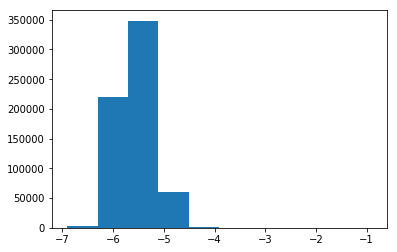

In [34]:
SO2_data["SO2_log_return"]=numpy.log(SO2_data["SO2"])
plt.hist(SO2_data["SO2_log_return"])
plt.show()

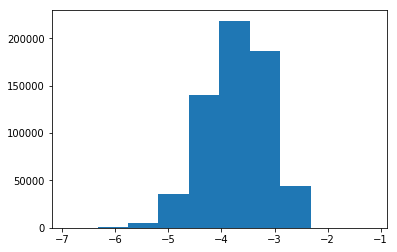

In [35]:
NO2_data["NO2_log_return"]=numpy.log(NO2_data["NO2"])
plt.hist(NO2_data["NO2_log_return"])
plt.show()

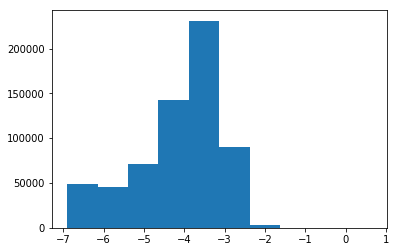

In [36]:
O3_data["O3_log_return"]=numpy.log(O3_data["O3"])
plt.hist(O3_data["O3_log_return"])
plt.show()

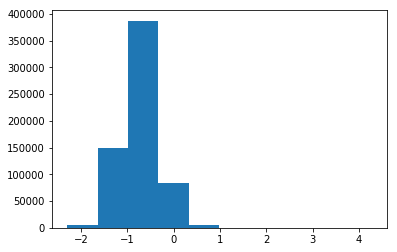

In [37]:
CO_data["CO_log_return"]=numpy.log(CO_data["CO"])
plt.hist(CO_data["CO_log_return"])
plt.show()

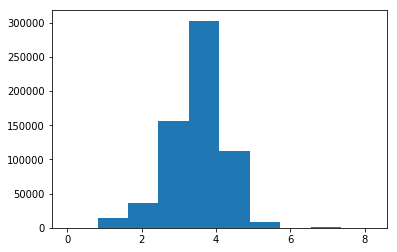

In [38]:
PM10_data["PM10_log_return"]=numpy.log(PM10_data["PM10"])
plt.hist(PM10_data["PM10_log_return"])
plt.show()

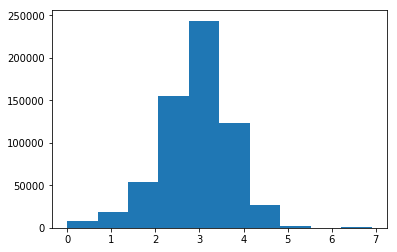

In [39]:
PM25_data["PM2.5_log_return"]=numpy.log(PM25_data["PM2.5"])
plt.hist(PM25_data["PM2.5_log_return"])
plt.show()

<font face="微软雅黑" size=4  >6.2.1 Setting to avoid overfitting when building a numeric prediction model

In [40]:
SO2_data.to_csv("SO2_data_new.csv")
NO2_data.to_csv("NO2_data_new.csv")
O3_data.to_csv("O3_data_new.csv")
CO_data.to_csv("CO_data_new.csv")
PM10_data.to_csv("PM10_data_new.csv")
PM25_data.to_csv("PM25_data_new.csv")

In [41]:
filepandas.to_csv("filepandas_new.csv")

In [2]:
SO2_file = spark.read.csv('./SO2_data_new.csv', header=True, inferSchema=True)

In [3]:
SO2_file.show()

+---+----------------+------------+-----+---------+------------------+
|_c0|Measurement date|Station code|  SO2|SO2_state|    SO2_log_return|
+---+----------------+------------+-----+---------+------------------+
|  0|               0|   Jongno-gu|0.004|        1|-5.521460917862246|
|  1|               1|   Jongno-gu|0.004|        1|-5.521460917862246|
|  2|               2|   Jongno-gu|0.004|        1|-5.521460917862246|
|  3|               3|   Jongno-gu|0.004|        1|-5.521460917862246|
|  4|               4|   Jongno-gu|0.003|        1|-5.809142990314028|
|  5|               5|   Jongno-gu|0.003|        1|-5.809142990314028|
|  6|               6|   Jongno-gu|0.003|        1|-5.809142990314028|
|  7|               7|   Jongno-gu|0.003|        1|-5.809142990314028|
|  8|               8|   Jongno-gu|0.004|        1|-5.521460917862246|
|  9|               9|   Jongno-gu|0.003|        1|-5.809142990314028|
| 10|              10|   Jongno-gu|0.004|        1|-5.521460917862246|
| 11| 

In [2]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [5]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=["Measurement date", "SO2_state", "SO2_log_return"],
    outputCol="features")

In [6]:
# Now that we've created the assembler variable, let's actually transform the data.
output_numeric = assembler.transform(SO2_file)

In [6]:
# Using print schema, you see that the features output column has been added. 
output_numeric.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Measurement date: integer (nullable = true)
 |-- Station code: string (nullable = true)
 |-- SO2: double (nullable = true)
 |-- SO2_state: integer (nullable = true)
 |-- SO2_log_return: double (nullable = true)
 |-- features: vector (nullable = true)



In [7]:
final_data_numeric = output_numeric.select("features",'SO2')
final_data_numeric.show()

+--------------------+-----+
|            features|  SO2|
+--------------------+-----+
|[0.0,1.0,-5.52146...|0.004|
|[1.0,1.0,-5.52146...|0.004|
|[2.0,1.0,-5.52146...|0.004|
|[3.0,1.0,-5.52146...|0.004|
|[4.0,1.0,-5.80914...|0.003|
|[5.0,1.0,-5.80914...|0.003|
|[6.0,1.0,-5.80914...|0.003|
|[7.0,1.0,-5.80914...|0.003|
|[8.0,1.0,-5.52146...|0.004|
|[9.0,1.0,-5.80914...|0.003|
|[10.0,1.0,-5.5214...|0.004|
|[11.0,1.0,-5.5214...|0.004|
|[12.0,1.0,-5.5214...|0.004|
|[13.0,1.0,-5.2983...|0.005|
|[14.0,1.0,-5.1159...|0.006|
|[15.0,1.0,-5.1159...|0.006|
|[16.0,1.0,-5.1159...|0.006|
|[17.0,1.0,-5.2983...|0.005|
|[18.0,1.0,-5.2983...|0.005|
|[19.0,1.0,-5.2983...|0.005|
+--------------------+-----+
only showing top 20 rows



In [17]:
numeric_train_data,numeric_test_data = final_data_numeric.randomSplit([0.7,0.3])

In [19]:
# Let's see our training data.
numeric_train_data.describe().show()

# And our testing data.
numeric_test_data.describe().show()

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|              442537|
|   mean|0.004380980573361927|
| stddev|0.003012223231234...|
|    min|               0.001|
|    max|               0.406|
+-------+--------------------+

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|              189904|
|   mean|0.004376116353527991|
| stddev|0.003114859666818847|
|    min|               0.001|
|    max|                0.37|
+-------+--------------------+



<font face="微软雅黑" size=4  >6.2.2 Choose a numeric prediction algorithm

In [9]:
#a linear regression model is trained with the elastic net parameter α set to 1, it is equivalent to a Lasso model.
lr_Lasso = LinearRegression(maxIter=10,regParam=0.3,elasticNetParam=1.0,labelCol='SO2')

In [23]:
# Fit the model to the data.
lrModel_Lasso = lr_Lasso.fit(numeric_train_data)

In [25]:
# Let's evaluate the model against the test data.
test_results_Lasso = lrModel_Lasso.evaluate(numeric_test_data)

In [26]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Lasso: {}".format(test_results_Lasso.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Lasso: {}".format(test_results_Lasso.r2))

RSME_Lasso: 0.0031148552636998316
R2_Lasso: -2.4386632859751955e-06


In [10]:
#elasticNetParam=0,the trained model reduces to a ridge regression model.
lr_Ridge = LinearRegression(maxIter=10,regParam=0.3,elasticNetParam=0,labelCol='SO2')

In [30]:
# Fit the model to the data.
lrModel_Ridge = lr_Ridge.fit(numeric_train_data)

In [31]:
# Let's evaluate the model against the test data.
test_results_Ridge = lrModel_Ridge.evaluate(numeric_test_data)

In [32]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Ridge: {}".format(test_results_Ridge.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Ridge: {}".format(test_results_Ridge.r2))

RSME_Ridge: 0.0031012169740448027
R2_Ridge: 0.00873534482367977


In [11]:
#Function default linear regression
lr_initial = LinearRegression(labelCol='SO2')

In [34]:
# Fit the model to the data.
lrModel_initial = lr_initial.fit(numeric_train_data)

In [35]:
# Let's evaluate the model against the test data.
test_results_initial = lrModel_initial.evaluate(numeric_test_data)

In [37]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial.r2))

RSME_initial: 0.0023536585090204037
R2_initial: 0.42903140748885904


<font face="微软雅黑" size=4  >6.2.3 Setting to avoid overfitting when building a categorize prediction model

In [4]:
# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
indexer = StringIndexer(inputCol="Station code", outputCol="Station code Index")
output_fixed = indexer.fit(SO2_file).transform(SO2_file)

In [5]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler2 = VectorAssembler(
    inputCols=["Measurement date", "Station code Index", "SO2_log_return"],
    outputCol="features")
# Now that we've created the assembler variable, let's actually transform the data.
output_categorize = assembler2.transform(output_fixed)

In [6]:
final_data_categorize = output_categorize.select("features",'SO2_state')
final_data_categorize.show()

+--------------------+---------+
|            features|SO2_state|
+--------------------+---------+
|[0.0,1.0,-5.52146...|        1|
|[1.0,1.0,-5.52146...|        1|
|[2.0,1.0,-5.52146...|        1|
|[3.0,1.0,-5.52146...|        1|
|[4.0,1.0,-5.80914...|        1|
|[5.0,1.0,-5.80914...|        1|
|[6.0,1.0,-5.80914...|        1|
|[7.0,1.0,-5.80914...|        1|
|[8.0,1.0,-5.52146...|        1|
|[9.0,1.0,-5.80914...|        1|
|[10.0,1.0,-5.5214...|        1|
|[11.0,1.0,-5.5214...|        1|
|[12.0,1.0,-5.5214...|        1|
|[13.0,1.0,-5.2983...|        1|
|[14.0,1.0,-5.1159...|        1|
|[15.0,1.0,-5.1159...|        1|
|[16.0,1.0,-5.1159...|        1|
|[17.0,1.0,-5.2983...|        1|
|[18.0,1.0,-5.2983...|        1|
|[19.0,1.0,-5.2983...|        1|
+--------------------+---------+
only showing top 20 rows



In [11]:
# Split the training and testing set.
categorize_train_data,categorize_test_data = final_data_categorize.randomSplit([0.7,0.3])

In [25]:
# Let's see our training data.
categorize_train_data.describe().show()

# And our testing data.
categorize_test_data.describe().show()

+-------+------------------+
|summary|         SO2_state|
+-------+------------------+
|  count|            443439|
|   mean|1.0002412958715854|
| stddev|0.0336117572793937|
|    min|                 0|
|    max|                 3|
+-------+------------------+

+-------+--------------------+
|summary|           SO2_state|
+-------+--------------------+
|  count|              189002|
|   mean|   1.000211637972085|
| stddev|0.033013581026504125|
|    min|                   0|
|    max|                   3|
+-------+--------------------+



<font face="微软雅黑" size=4  >6.2.4 Choose a categorize prediction algorithm

In [28]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier,LogisticRegression
from pyspark.ml import Pipeline

In [10]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.

dtc = DecisionTreeClassifier(labelCol='SO2_state',featuresCol='features')
rfc = RandomForestClassifier(labelCol='SO2_state',featuresCol='features')
Logist = LogisticRegression(labelCol='SO2_state',featuresCol='features')

In [20]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(categorize_train_data)
rfc_model = rfc.fit(categorize_train_data)
Logist_model=Logist.fit(categorize_train_data)

In [21]:
dtc_predictions = dtc_model.transform(categorize_test_data)
rfc_predictions = rfc_model.transform(categorize_test_data)
Logist_predictions=Logist_model.transform(categorize_test_data)

In [23]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'SO2_state')

In [24]:

print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

print("Logist")
print(my_binary_eval.evaluate(Logist_predictions))

DTC
0.9997671082787714
RFC
0.9998788774532029
Logist
0.9999367015963156


<font face="微软雅黑" size=4  >7.1 Creating Test

In [8]:
numeric_train_data1,numeric_test_data1 = final_data_numeric.randomSplit([0.7,0.3])
numeric_train_data2,numeric_test_data2 = final_data_numeric.randomSplit([0.8,0.2])
numeric_train_data3,numeric_test_data3 = final_data_numeric.randomSplit([0.9,0.1])

In [12]:
# Fit the model to the data.
lrModel_Lasso = lr_Lasso.fit(numeric_train_data1)
# Let's evaluate the model against the test data.
test_results_Lasso = lrModel_Lasso.evaluate(numeric_test_data1)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Lasso: {}".format(test_results_Lasso.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Lasso: {}".format(test_results_Lasso.r2))
# Fit the model to the data.
lrModel_Ridge = lr_Ridge.fit(numeric_train_data1)
# Let's evaluate the model against the test data.
test_results_Ridge = lrModel_Ridge.evaluate(numeric_test_data1)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Ridge: {}".format(test_results_Ridge.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Ridge: {}".format(test_results_Ridge.r2))
# Fit the model to the data.
lrModel_initial = lr_initial.fit(numeric_train_data1)
# Let's evaluate the model against the test data.
test_results_initial = lrModel_initial.evaluate(numeric_test_data1)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial.r2))

RSME_Lasso: 0.0030539916362155323
R2_Lasso: -2.3548059872258165e-05
RSME_Ridge: 0.003040011077062442
R2_Ridge: 0.009111308339825541
RSME_initial: 0.0022715344498957972
R2_initial: 0.44676048066534146


In [13]:
# Fit the model to the data.
lrModel_Lasso = lr_Lasso.fit(numeric_train_data2)
# Let's evaluate the model against the test data.
test_results_Lasso = lrModel_Lasso.evaluate(numeric_test_data2)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Lasso: {}".format(test_results_Lasso.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Lasso: {}".format(test_results_Lasso.r2))
# Fit the model to the data.
lrModel_Ridge = lr_Ridge.fit(numeric_train_data2)
# Let's evaluate the model against the test data.
test_results_Ridge = lrModel_Ridge.evaluate(numeric_test_data2)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Ridge: {}".format(test_results_Ridge.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Ridge: {}".format(test_results_Ridge.r2))
# Fit the model to the data.
lrModel_initial = lr_initial.fit(numeric_train_data2)
# Let's evaluate the model against the test data.
test_results_initial = lrModel_initial.evaluate(numeric_test_data2)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial.r2))

RSME_Lasso: 0.0034432587555093784
R2_Lasso: -1.210582853161668e-05
RSME_Ridge: 0.0034307765564125735
R2_Ridge: 0.007225064613355259
RSME_initial: 0.0026992308670103124
R2_initial: 0.38546588126527925


In [14]:
# Fit the model to the data.
lrModel_Lasso = lr_Lasso.fit(numeric_train_data3)
# Let's evaluate the model against the test data.
test_results_Lasso = lrModel_Lasso.evaluate(numeric_test_data3)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Lasso: {}".format(test_results_Lasso.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Lasso: {}".format(test_results_Lasso.r2))
# Fit the model to the data.
lrModel_Ridge = lr_Ridge.fit(numeric_train_data3)
# Let's evaluate the model against the test data.
test_results_Ridge = lrModel_Ridge.evaluate(numeric_test_data3)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Ridge: {}".format(test_results_Ridge.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_Ridge: {}".format(test_results_Ridge.r2))
# Fit the model to the data.
lrModel_initial = lr_initial.fit(numeric_train_data3)
# Let's evaluate the model against the test data.
test_results_initial = lrModel_initial.evaluate(numeric_test_data3)
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial.r2))

RSME_Lasso: 0.0024727266723566623
R2_Lasso: -4.017495457442344e-05
RSME_Ridge: 0.0024563552708692306
R2_Ridge: 0.013158098365016357
RSME_initial: 0.001609193530603601
R2_initial: 0.576472342309706


In [8]:
categorize_train_data2,categorize_test_data2 = final_data_categorize.randomSplit([0.8,0.2])
categorize_train_data3,categorize_test_data3 = final_data_categorize.randomSplit([0.9,0.1])

In [11]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(categorize_train_data2)
rfc_model = rfc.fit(categorize_train_data2)
Logist_model=Logist.fit(categorize_train_data2)

In [22]:
dtc_predictions = dtc_model.transform(categorize_test_data2)
rfc_predictions = rfc_model.transform(categorize_test_data2)
Logist_predictions=Logist_model.transform(categorize_test_data2)

In [24]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

print("Logist")
print(my_binary_eval.evaluate(Logist_predictions))

DTC
0.9997394126519106
RFC
0.9999735706090993
Logist
0.9999672855710187


In [13]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(categorize_train_data3)
rfc_model = rfc.fit(categorize_train_data3)
Logist_model=Logist.fit(categorize_train_data3)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:45652)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:45652)

<font face="微软雅黑" size=4  >7.2.1 Target One-Realize the prediction of polluted gas data

In [8]:
numeric_train_data3,numeric_test_data3 = final_data_numeric.randomSplit([0.9,0.1])

In [9]:
# Let's see our training data.
numeric_train_data3.describe().show()

# And our testing data.
numeric_test_data3.describe().show()

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|              569093|
|   mean|0.004383436450635127|
| stddev|0.003104315371989274|
|    min|               0.001|
|    max|               0.406|
+-------+--------------------+

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|               63348|
|   mean|0.004344336048491283|
| stddev|0.002428369842137869|
|    min|               0.001|
|    max|               0.273|
+-------+--------------------+



In [9]:
#Function default linear regression
lr_initial = LinearRegression(labelCol='SO2')

In [10]:
# Fit the model to the data.
lrModel_initial = lr_initial.fit(numeric_train_data3)

In [11]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel_initial.coefficients,lrModel_initial.intercept))

Coefficients: [1.4714604246558787e-08,0.005147951805830881,0.0052061909439304775] Intercept: 0.02774539150187676


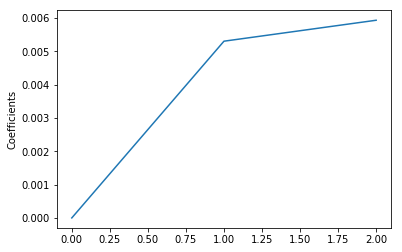

In [13]:
x=numpy.sort(lrModel_initial.coefficients)
plt.plot(x)
plt.ylabel('Coefficients')
plt.show()

In [12]:
# Let's evaluate the model against the test data.
test_results_initial = lrModel_initial.evaluate(numeric_test_data3)

In [12]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial.r2))

RSME_initial: 0.0024044896635714115
R2_initial: 0.4263281867039632


In [13]:
results_columns=lrModel_initial.transform(numeric_test_data3)

In [14]:
results_columns.dtypes

[('features', 'vector'), ('SO2', 'double'), ('prediction', 'double')]

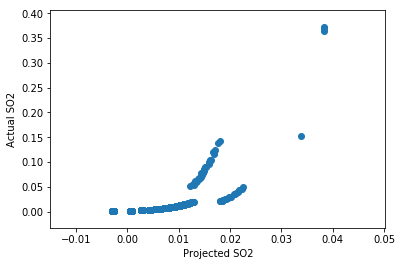

In [15]:
results_columns=results_columns.toPandas()
plt.scatter(x=results_columns['prediction'],y=results_columns['SO2'])
plt.xlabel('Projected SO2')
plt.ylabel('Actual SO2')
plt.show()

<font face="微软雅黑" size=4  >7.2.1 Target Two-Realize the prediction of the polluted gas status

In [7]:
# Split the training and testing set.
categorize_train_data,categorize_test_data = final_data_categorize.randomSplit([0.7,0.3])

In [8]:
# Let's see our training data.
categorize_train_data.describe().show()

# And our testing data.
categorize_test_data.describe().show()

+-------+--------------------+
|summary|           SO2_state|
+-------+--------------------+
|  count|              442994|
|   mean|  1.0001986482886902|
| stddev|0.033528074818995994|
|    min|                   0|
|    max|                   3|
+-------+--------------------+

+-------+--------------------+
|summary|           SO2_state|
+-------+--------------------+
|  count|              189447|
|   mean|   1.000311432749001|
| stddev|0.033213246708372744|
|    min|                   0|
|    max|                   3|
+-------+--------------------+



In [9]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.
Logist = LogisticRegression(labelCol='SO2_state',featuresCol='features')

In [10]:
# Train the models (it's three models, so it might take some time).
Logist_model=Logist.fit(categorize_train_data)

In [11]:
Logist_predictions=Logist_model.transform(categorize_test_data)

In [12]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'SO2_state')

In [13]:
print("Logist")
print(my_binary_eval.evaluate(Logist_predictions))

Logist
0.9999450845381305


In [14]:
Logist_predictions.select("SO2_state",'prediction').show()

+---------+----------+
|SO2_state|prediction|
+---------+----------+
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
+---------+----------+
only showing top 20 rows



In [28]:
Logist_predictions.dtypes

[('features', 'vector'),
 ('SO2_state', 'int'),
 ('rawPrediction', 'vector'),
 ('probability', 'vector'),
 ('prediction', 'double')]

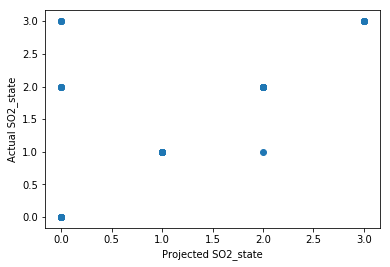

In [17]:
SO2pre = numpy.array(Logist_predictions.select('prediction').collect())
SO2re = numpy.array(Logist_predictions.select('SO2_state').collect())
plt.scatter(x=SO2pre,y=SO2re)
plt.xlabel('Projected SO2_state')
plt.ylabel('Actual SO2_state')
plt.show()

<font face="微软雅黑" size=4  >8.5 Multiple iterations

In [3]:
new_file = spark.read.csv('./filepandas_new.csv', header=True, inferSchema=True)

In [4]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler_iterations = VectorAssembler(
    inputCols=["Measurement date", "SO2_state","CO","O3","PM10","NO2"],
    outputCol="features")

In [5]:
# Now that we've created the assembler variable, let's actually transform the data.
output_numeric_iterations = assembler_iterations.transform(new_file)

In [7]:
# Using print schema, you see that the features output column has been added. 
output_numeric_iterations.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Measurement date: integer (nullable = true)
 |-- Station code: string (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM2.5: double (nullable = true)
 |-- SO2_state: integer (nullable = true)
 |-- NO2_state: integer (nullable = true)
 |-- CO_state: integer (nullable = true)
 |-- O3_state: integer (nullable = true)
 |-- PM10_state: integer (nullable = true)
 |-- PM2.5_state: integer (nullable = true)
 |-- features: vector (nullable = true)



In [8]:
final_data_numeric_iterations = output_numeric_iterations.select("features",'SO2')
final_data_numeric_iterations.show()

+--------------------+-----+
|            features|  SO2|
+--------------------+-----+
|[0.0,1.0,1.2,0.00...|0.004|
|[1.0,1.0,1.2,0.00...|0.004|
|[2.0,1.0,1.2,0.00...|0.004|
|[3.0,1.0,1.2,0.00...|0.004|
|[4.0,1.0,1.2,0.00...|0.003|
|[5.0,1.0,1.1,0.00...|0.003|
|[6.0,1.0,1.1,0.00...|0.003|
|[7.0,1.0,1.0,0.00...|0.003|
|[8.0,1.0,1.1,0.00...|0.004|
|[9.0,1.0,1.1,0.00...|0.003|
|[10.0,1.0,1.0,0.0...|0.004|
|[11.0,1.0,1.0,0.0...|0.004|
|[12.0,1.0,1.0,0.0...|0.004|
|[13.0,1.0,1.0,0.0...|0.005|
|[14.0,1.0,0.9,0.0...|0.006|
|[15.0,1.0,0.8,0.0...|0.006|
|[16.0,1.0,0.9,0.0...|0.006|
|[17.0,1.0,0.9,0.0...|0.005|
|[18.0,1.0,1.0,0.0...|0.005|
|[19.0,1.0,1.0,0.0...|0.005|
+--------------------+-----+
only showing top 20 rows



In [9]:
numeric_train_data_iterations,numeric_test_data_iterations = final_data_numeric_iterations.randomSplit([0.9,0.1])

In [10]:
# Let's see our training data.
numeric_train_data_iterations.describe().show()

# And our testing data.
numeric_test_data_iterations.describe().show()

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|              569422|
|   mean|0.004380828278502193|
| stddev|0.003088161435427...|
|    min|               0.001|
|    max|               0.406|
+-------+--------------------+

+-------+--------------------+
|summary|                 SO2|
+-------+--------------------+
|  count|               63019|
|   mean|0.004367698630569013|
| stddev|0.002604335826614...|
|    min|               0.001|
|    max|               0.273|
+-------+--------------------+



In [11]:
#Function default linear regression
lr_initial = LinearRegression(labelCol='SO2')

In [12]:
# Fit the model to the data.
lrModel_initial_iterations = lr_initial.fit(numeric_train_data_iterations)

In [14]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel_initial_iterations.coefficients,lrModel_initial_iterations.intercept))

Coefficients: [-4.208555575812566e-08,0.006756102183685241,0.004652385066837953,0.016876937016459464,1.3502576797050432e-06,-0.00820281781254946] Intercept: -0.004499695008020196


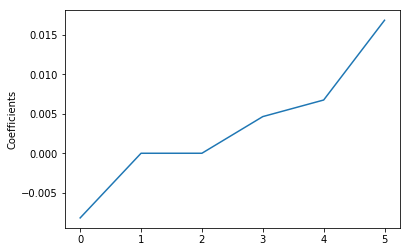

In [15]:
x=numpy.sort(lrModel_initial_iterations.coefficients)
plt.plot(x)
plt.ylabel('Coefficients')
plt.show()

In [16]:
# Let's evaluate the model against the test data.
test_results_initial_iterations = lrModel_initial_iterations.evaluate(numeric_test_data_iterations)

In [17]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_initial: {}".format(test_results_initial_iterations.rootMeanSquaredError))
# We can also get the R2 value. 
print("R2_initial: {}".format(test_results_initial_iterations.r2))

RSME_initial: 0.0020847053281311478
R2_initial: 0.35922984787567536


In [20]:
results_columns_iterations=lrModel_initial_iterations.transform(numeric_test_data_iterations)

In [22]:
results_columns_iterations.dtypes

[('features', 'vector'), ('SO2', 'double'), ('prediction', 'double')]

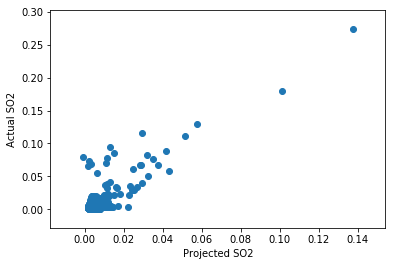

In [23]:
results_columns_iterations=results_columns_iterations.toPandas()
plt.scatter(x=results_columns_iterations['prediction'],y=results_columns_iterations['SO2'])
plt.xlabel('Projected SO2')
plt.ylabel('Actual SO2')
plt.show()

In [4]:
# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
indexer = StringIndexer(inputCol="Station code", outputCol="Station code Index")
output_fixed = indexer.fit(new_file).transform(new_file)

In [5]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler2_iterations = VectorAssembler(
    inputCols=["Measurement date", "Station code Index", "CO_state","NO2_state","O3_state","PM10_state"],
    outputCol="features")
# Now that we've created the assembler variable, let's actually transform the data.
output_categorize_iterations = assembler2_iterations.transform(output_fixed)

In [6]:
final_data_categorize_iterations = output_categorize_iterations.select("features",'SO2_state')
final_data_categorize_iterations.show()

+--------------------+---------+
|            features|SO2_state|
+--------------------+---------+
|[0.0,1.0,1.0,2.0,...|        1|
|[1.0,1.0,1.0,2.0,...|        1|
|[2.0,1.0,1.0,2.0,...|        1|
|[3.0,1.0,1.0,2.0,...|        1|
|[4.0,1.0,1.0,2.0,...|        1|
|[5.0,1.0,1.0,2.0,...|        1|
|[6.0,1.0,1.0,2.0,...|        1|
|[7.0,1.0,1.0,2.0,...|        1|
|[8.0,1.0,1.0,2.0,...|        1|
|[9.0,1.0,1.0,2.0,...|        1|
|[10.0,1.0,1.0,2.0...|        1|
|[11.0,1.0,1.0,2.0...|        1|
|[12.0,1.0,1.0,2.0...|        1|
|[13.0,1.0,1.0,2.0...|        1|
|[14.0,1.0,1.0,2.0...|        1|
|[15.0,1.0,1.0,2.0...|        1|
|[16.0,1.0,1.0,0.0...|        1|
|[17.0,1.0,1.0,0.0...|        1|
|[18.0,1.0,1.0,0.0...|        1|
|[19.0,1.0,1.0,0.0...|        1|
+--------------------+---------+
only showing top 20 rows



In [7]:
# Split the training and testing set.
categorize_train_data_iterations,categorize_test_data_iterations = final_data_categorize_iterations.randomSplit([0.7,0.3])

In [29]:
# Let's see our training data.
categorize_train_data_iterations.describe().show()

# And our testing data.
categorize_test_data_iterations.describe().show()

+-------+-------------------+
|summary|          SO2_state|
+-------+-------------------+
|  count|             443142|
|   mean| 1.0002392009784673|
| stddev|0.03358946011957246|
|    min|                  0|
|    max|                  3|
+-------+-------------------+

+-------+--------------------+
|summary|           SO2_state|
+-------+--------------------+
|  count|              189299|
|   mean|   1.000216588571519|
| stddev|0.033067612849424985|
|    min|                   0|
|    max|                   3|
+-------+--------------------+



In [8]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.
Logist = LogisticRegression(labelCol='SO2_state',featuresCol='features')

In [9]:
# Train the models (it's three models, so it might take some time).
Logist_model_iterations=Logist.fit(categorize_train_data_iterations)

In [10]:
Logist_predictions_iterations=Logist_model_iterations.transform(categorize_test_data_iterations)

In [11]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'SO2_state')

In [12]:
print("Logist")
print(my_binary_eval.evaluate(Logist_predictions_iterations))

Logist
0.6863471654470135


In [36]:
Logist_predictions_iterations.select("SO2_state",'prediction').show()

+---------+----------+
|SO2_state|prediction|
+---------+----------+
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
+---------+----------+
only showing top 20 rows



In [38]:
Logist_predictions_iterations.dtypes

[('features', 'vector'),
 ('SO2_state', 'int'),
 ('rawPrediction', 'vector'),
 ('probability', 'vector'),
 ('prediction', 'double')]

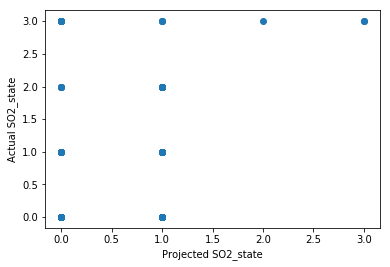

In [13]:
SO2pre = numpy.array(Logist_predictions_iterations.select('prediction').collect())
SO2re = numpy.array(Logist_predictions_iterations.select('SO2_state').collect())
plt.scatter(x=SO2pre,y=SO2re)
plt.xlabel('Projected SO2_state')
plt.ylabel('Actual SO2_state')
plt.show()